# Google Play store data exploration

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# Importing essential libraries

In [259]:
import numpy as np # Linear Algebra
import pandas as pd # Data Structure

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly

plotly.offline.init_notebook_mode(connected=True) # connected=True means it will download the latest version of plotly javascript library.
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf


%matplotlib inline


sns.set(context='notebook', style='darkgrid')

# Loading the data set

In [2]:
# Reading the the dataset

playstore_df = pd.read_csv('raw_data/googleplaystore.csv')

playstore_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [357]:
user_reviews_df = pd.read_csv('raw_data/googleplaystore_user_reviews.csv')
user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# Lets do some EDA

In [4]:
playstore_df.shape

(10841, 13)

There are 10841 data points with 13 features <br>
Lets check some information about the data set

In [358]:
from colorama import Fore, Back, Style
print(Fore.RED)
print ('****************************')
print('Play Store Data Information')
print ('****************************')
print(Style.RESET_ALL)
playstore_df.info()

print(Fore.RED)
print ('*****************************')
print('User Reviews Data Information')
print ('*****************************')
print(Style.RESET_ALL)
user_reviews_df.info()


****************************
Play Store Data Information
****************************

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null int64
Size              8432 non-null float64
Installs          9659 non-null int64
Type              9659 non-null object
Price             9659 non-null float64
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null object
Current Ver       9651 non-null object
Android Ver       9657 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1.3+ MB

*****************************
User Reviews Data Information
*****************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 no

All features have correct data types We dont have to take care of that.<br> We have missing values in Age, Cabin and Embarked

In [6]:
print(Fore.RED)
print('Descriptive statitics of play store data')
print ('****************************************')
print(Style.RESET_ALL)
playstore_df.describe(include='all')


Descriptive statitics of play store data
****************************************



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [359]:
print(Fore.RED)
print('Descriptive statitics of user reviews data')
print ('****************************************')
print(Style.RESET_ALL)
user_reviews_df.describe(include='all')


Descriptive statitics of user reviews data
****************************************



,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,"CBS Sports App - Scores, News, Stats & Watch Live",Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


## Finding Duplicate Values and removing it

In [8]:
playstore_df.duplicated().value_counts()

False    10358
True       483
dtype: int64

There 483 duplicated rows in the dataframe <br>

We can delete 483 rows from the dataset if we remove the duplicates


In [9]:
playstore_df.loc[playstore_df.duplicated(), :].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up


##### Lets check duplicated rows by considering only the App name

In [10]:
playstore_df.duplicated(subset='App', keep='first').sum() # Finding how many duplicated rows are there considering app name
playstore_df.drop_duplicates(subset='App', keep='first', inplace=True)

## Handling Missing Values

Now lets take care of missing

Visualize the missing values using an heatmap


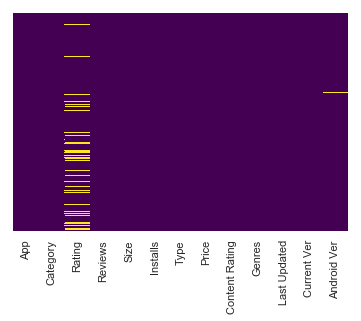

In [11]:
sns.heatmap(playstore_df.isnull(), cbar=False, cmap='viridis', yticklabels=False )

We have missing values in Ratings and Current version column<br>
Lets check the count of missing values. Its always to check the count also. Sometimes small value counts will not show in heatma if the fig size is small

In [12]:
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

We can ignore rest of the missing columns

Lets fill the Type missed value as free because its price is zero

In [13]:
playstore_df.loc[:, 'Type'].fillna('Free', inplace=True)

Lest check ratings column

In [14]:
playstore_df['Rating'].isnull().sum()

1463

Rating is the most important feature. Lets analysze it before dropping

In [15]:
playstore_df['Rating'].describe()

count    8197.000000
mean        4.175052
std         0.561026
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

Max value is 19. Looks like there is some misplace in data. Lets find out in which row.

In [16]:
playstore_df[playstore_df['Rating'] == playstore_df['Rating'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Data is missplaced . Lets remove this row.

In [17]:
playstore_df = playstore_df.drop(playstore_df[playstore_df['Rating'] == playstore_df['Rating'].max()].index)

## Data Cleaning

In [18]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Lets remove '+' and ',' from installs and convert it in to int

In [19]:
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x:x.replace('+','') if '+' in str(x) else x) #Removing '+'

playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x:x.replace(',','') if ',' in str(x) else x) # Removing ','

playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x:int(x))

Now lets remove 'M' from Size and convert it in to float. Also if the Size is in Kb convert it in to MB.

In [20]:
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') 
if 'Varies with device' in str(x) else x) # Replacng the default text

playstore_df['Size'] = playstore_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x) # Replacing M

playstore_df['Size'] = playstore_df['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x) # Replacing ,

playstore_df['Size'] = playstore_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 
if 'k' in str(x) else x)  #replacing K and concerting KB to MB

playstore_df['Size'] = playstore_df['Size'].apply(lambda x: float(x)) # Converting to float

In [21]:
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Lets remove '$' from price and convert it in to float.<br>

Also convert reviews to int

In [22]:
playstore_df['Price'] = playstore_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
playstore_df['Price'] = playstore_df['Price'].apply(lambda x: float(x))

playstore_df['Reviews'] = playstore_df['Reviews'].apply(lambda x: int(x))

In [23]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null int64
Size              8432 non-null float64
Installs          9659 non-null int64
Type              9659 non-null object
Price             9659 non-null float64
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null object
Current Ver       9651 non-null object
Android Ver       9657 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


#### Ok. Now lets do some EDA

Lets explore category of apps

In [68]:
category_df = pd.DataFrame(playstore_df.Category.value_counts().sort_values(ascending=True))
category_df

,Category
BEAUTY,53
COMICS,56
PARENTING,60
ART_AND_DESIGN,64
EVENTS,64
HOUSE_AND_HOME,74
WEATHER,79
LIBRARIES_AND_DEMO,84
AUTO_AND_VEHICLES,85
ENTERTAINMENT,102


In [67]:
labels = category_df.index
values = category_df.values.reshape(33,)
trace = [go.Pie(labels=labels,  values=values, hoverinfo = 'label+value')]

plotly.offline.iplot(trace, filename='Categories')

Now lets check the category based on free or paid

In [82]:
free_apps = playstore_df[playstore_df.Type == 'Free']['Category'].value_counts().to_frame()
paid_apps = playstore_df[playstore_df.Type == 'Paid']['Category'].value_counts().to_frame()

joined_type = free_apps.join(paid_apps, lsuffix='_Free', rsuffix='_Paid')

joined_type

,Category_Free,Category_Paid
FAMILY,1649,183.0
GAME,877,82.0
TOOLS,749,78.0
BUSINESS,408,12.0
LIFESTYLE,350,19.0
PRODUCTIVITY,346,28.0
FINANCE,328,17.0
MEDICAL,312,83.0
SPORTS,301,24.0
PERSONALIZATION,295,81.0


In [99]:
trace = [go.Histogram(
        x = playstore_df.Category
        
)]
layout = go.Layout(
    xaxis=dict(tickwidth=9)
)
fig = go.Figure(data=trace, layout=layout)
plotly.offline.iplot(fig, filename='Category_distribution')


### Ratings of app distribution

In [87]:
trace = [go.Histogram(
        x = playstore_df.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

plotly.offline.iplot(trace, filename='overall_rating_distribution')


In [89]:
print (playstore_df.Rating.mean())

4.173243045387998


Average rating is 4.17<br>

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70.0,100,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up
640,Online Girls Chat Group,DATING,5.0,5,5.0,100,Free,0.0,Mature 17+,Dating,"August 2, 2018",8.2,4.0.3 and up
654,Speeding Joyride & Car Meet App,DATING,5.0,3,25.0,100,Free,0.0,Mature 17+,Dating,"July 20, 2018",1.2.9,4.1 and up
1028,SUMMER SONIC app,EVENTS,5.0,4,61.0,500,Free,0.0,Everyone,Events,"July 24, 2018",1.0,4.4 and up
1030,Prosperity,EVENTS,5.0,16,2.3,100,Free,0.0,Everyone,Events,"July 9, 2018",1.14,2.0 and up
1038,Mindvalley U Tallinn 2018,EVENTS,5.0,1,21.0,100,Free,0.0,Everyone,Events,"July 3, 2018",1.0.5,4.4 and up


### Rating Distribution

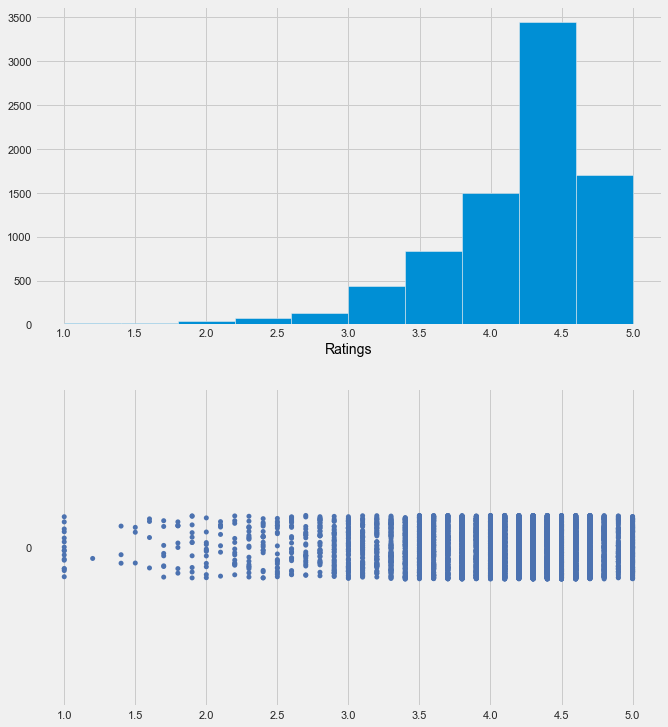

In [244]:
ratings = playstore_df['Rating']

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,12))

plt.subplot(2,1,1)
plt.hist(ratings, bins=None)

plt.xlabel('Ratings', fontsize=14, color='black')

plt.subplot(2,1,2)
sns.set(style="whitegrid")
sns.stripplot(data=ratings, jitter=True, orient='h')

Here we can clearly see the ratings are distributed heavily in 3 - 5 area. <br>Majority of apps are performing well in terms of ratings

### Top 5 Category

In [185]:
group_category_app = playstore_df.groupby(['Category']).count()[['App']].sort_values('App', ascending=False).reset_index().head(5)

In [199]:
trace = [go.Bar(
        x = group_category_app.Category, y=group_category_app.App, 
        marker=dict(
        color=['rgba(55, 128, 191, 0.7)', 'rgba(222,45,38,0.8)',
               'rgb(26, 118, 255)', 'rgba(219, 64, 82, 1.0)',
               'rgba(50, 171, 96, 0.7)'])
)]

plotly.offline.iplot(trace, filename='Category_performance')


### Best Performing Categories

Lets check which all categories are the best performing ones in terms of reviews

In [229]:
group_category = playstore_df.groupby('Category').filter(lambda x: len(x) >= 120)
trace = [go.Box(x = group_category.Category, y=group_category.Rating)]

plotly.offline.iplot(trace, filename='Category_performance')


<li>Most of the app categories perform decently.</li> 
<li>Health and Fitness and Books and Reference produce the highest quality apps with 50% apps having a rating greater than 4.5. This is extremely high!</li>
<li>50% of apps in the Dating category have a rating lesser than the average rating. Junks and bugs may be the reason</li>
<li>A few junk apps also exist in the Lifestyle, Family and Finance category.</li>

#### Is size of the app have a any impact on reviews? Let's check

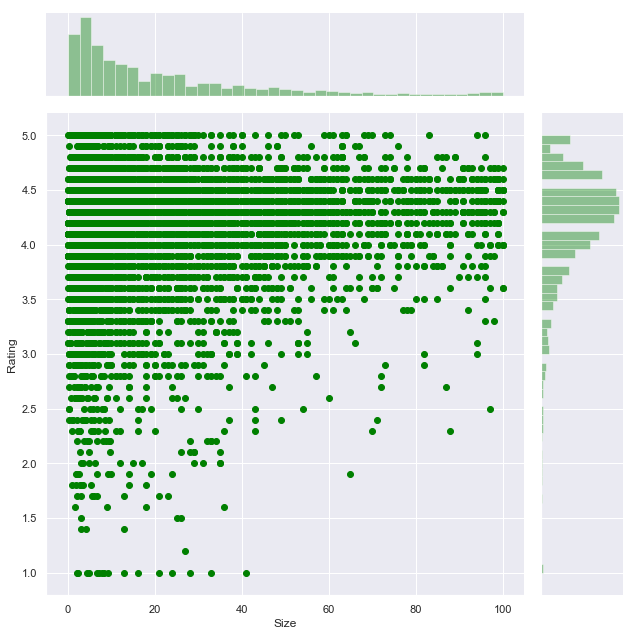

In [268]:
sns.jointplot(playstore_df['Size'], playstore_df['Rating'], color='green', height=9)

Top rated apps are sized between ~2MB to ~40MB <br>People tend to leave good reviews for the apps which consumes less space and good performance

### Reviews and Ratings

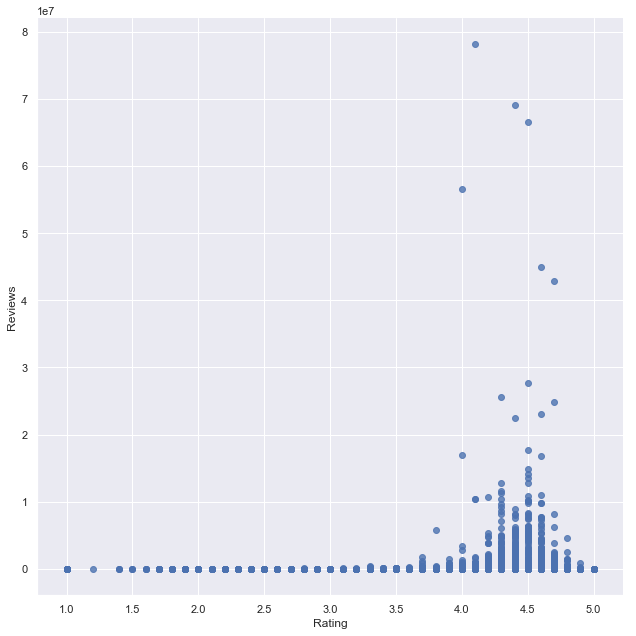

In [267]:
temp_df = playstore_df[['Rating', 'Reviews']].reset_index()

sns.lmplot(y='Reviews', x='Rating',data=temp_df,fit_reg=False, height=9)


As number of reviews increase rating also increasing with lots of exception. We can see that apps which got 0 reviews has rating 5

### Installs and category

Lets check which category has the highest number of installs

Text(0, 0.5, 'Categories')

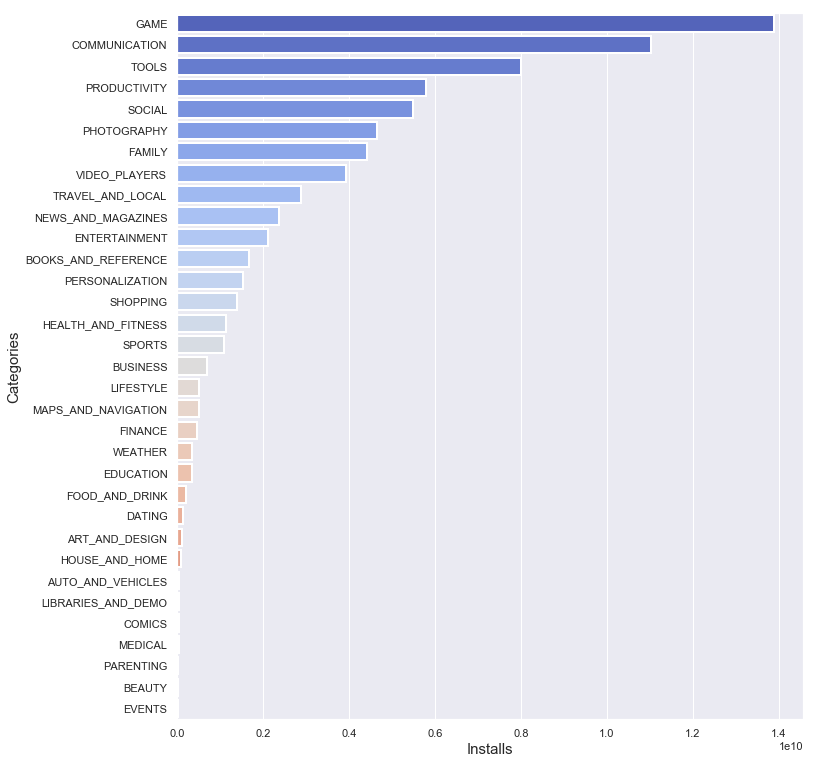

In [280]:
group_temp = playstore_df.groupby(['Category']).agg({'Installs':'sum'}).sort_values(by='Installs',ascending=False).reset_index()

plt.figure(figsize=(10,13))
sns.set_style("darkgrid")

sns.barplot(x=group_temp['Installs'], 
            y=group_temp['Category'], 
            linewidth=2, 
            
            palette="coolwarm" )


plt.xlabel('Installs', fontsize=15)
plt.ylabel('Categories', fontsize=15)

### Free vs Paid apps

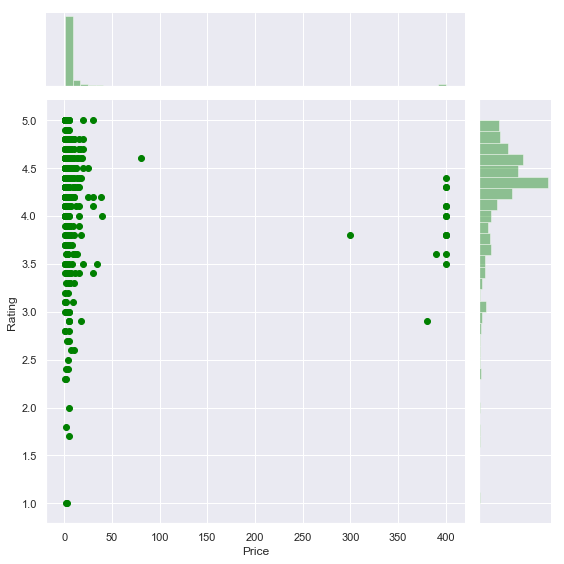

In [288]:
paid_apps = playstore_df[playstore_df.Price>0]
plot = sns.jointplot( "Price", "Rating", paid_apps, height=8, color='green')

Top rated apps are optimally priced between 1$ to 30$.<br> There are only a very few apps priced above 20$.
And price has no relation with rating

Lets check whether price is related to size of the app

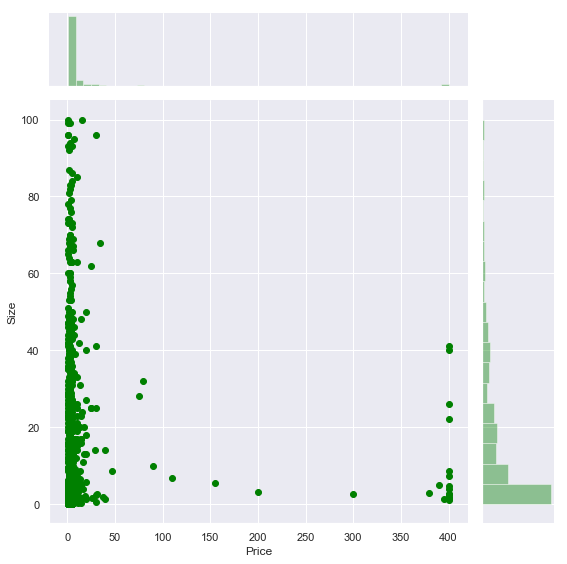

In [289]:
plot = sns.jointplot( "Price", "Size", paid_apps, height=8, color='green')

There is no relation with price and size of the app

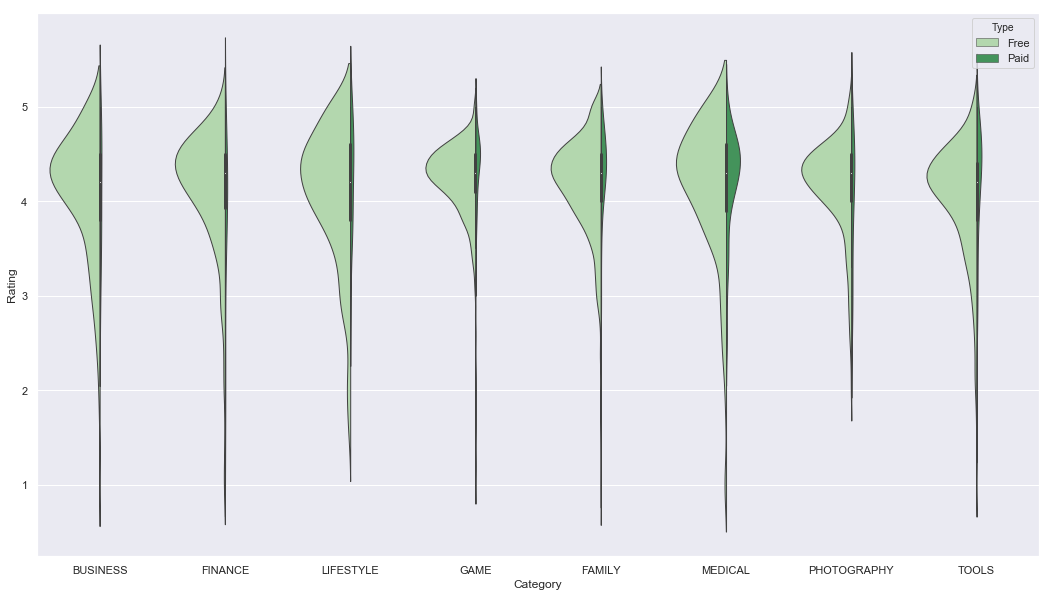

In [306]:
temp_categories = ['FAMILY', 'GAME', 'TOOLS', 'PHOTOGRAPHY', 'MEDICAL', 'FINANCE',
                                 'LIFESTYLE','BUSINESS']
    
df_temp_cat = playstore_df.loc[playstore_df.Category.isin(temp_categories)]

plt.figure(figsize=(16,10))
plot = sns.violinplot(x='Category', y='Rating', data=df_temp_cat,hue='Type',
               palette='Greens',split=True, scale='count',kde=False,linewidth=1)

Majority of apps in every categories are free apps.<br>
You can see in Medical category there are some paid apps.

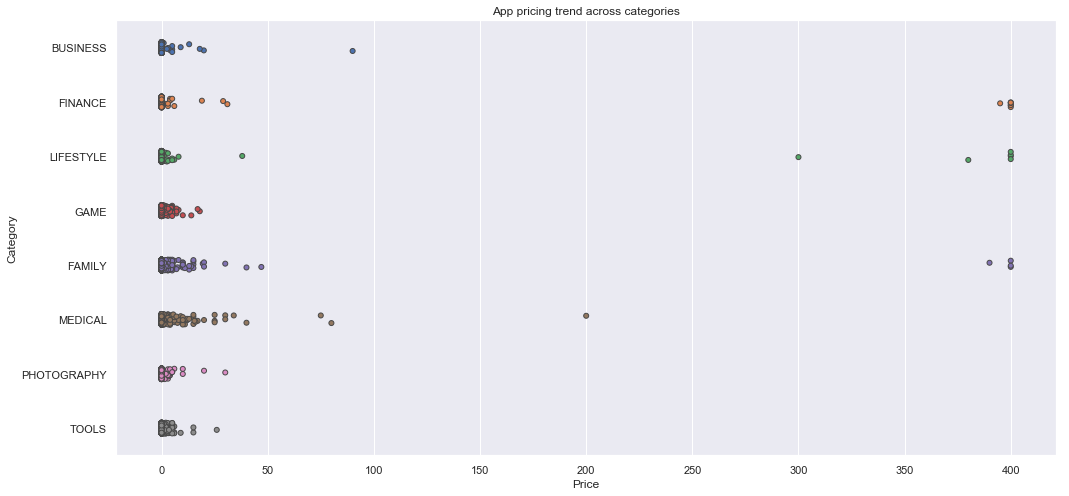

In [316]:
temp_df = playstore_df[playstore_df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS'])]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="Price", y="Category", data=temp_df, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories')

Some apps have  price around 400$. Something strange here. Might be some junk apps. Lets check


In [310]:
playstore_df[['Category', 'App']][playstore_df.Price > 200]

,Category,App
4197,FAMILY,most expensive app (H)
4362,LIFESTYLE,💎 I'm rich
4367,LIFESTYLE,I'm Rich - Trump Edition
5351,LIFESTYLE,I am rich
5354,FAMILY,I am Rich Plus
5355,LIFESTYLE,I am rich VIP
5356,FINANCE,I Am Rich Premium
5357,LIFESTYLE,I am extremely Rich
5358,FINANCE,I am Rich!
5359,FINANCE,I am rich(premium)


All apps seems to be fake

Lets clear the junk apps and check the distribution once again

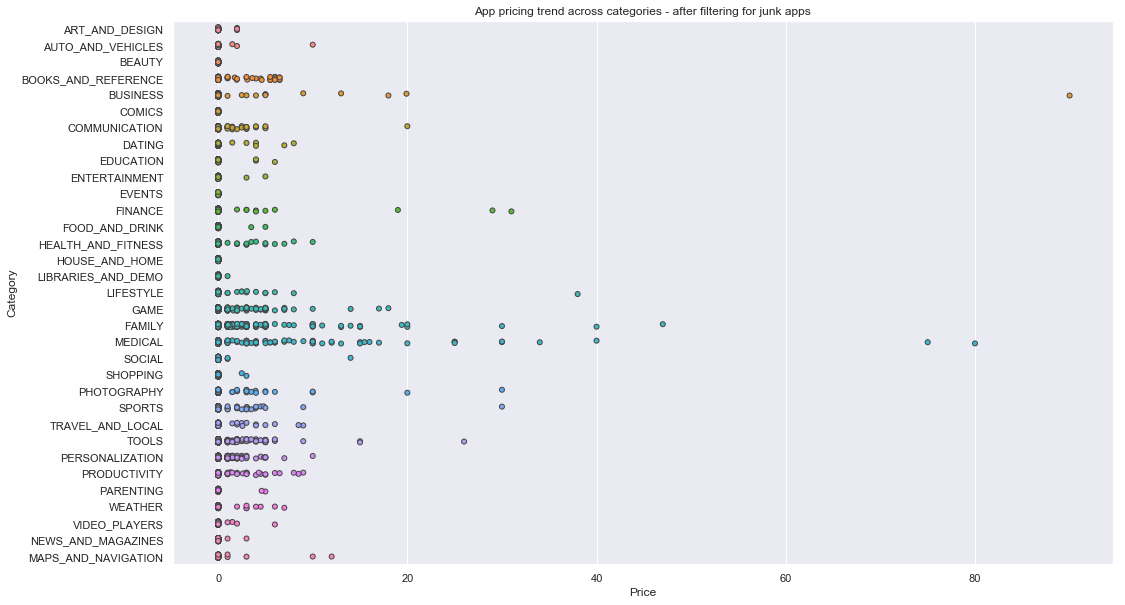

In [333]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
temp_df_price = playstore_df[['Category', 'App', 'Price']][playstore_df.Price<100]
plot = sns.stripplot(x="Price", y="Category", data=temp_df_price, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories - after filtering for junk apps')

<li>Medical and Family apps are more expensive</li>
<li>All other apps are priced under 30$</li>

### Best Performing Apps

In [338]:
temp_perform_df = playstore_df[(playstore_df.Installs >= 1000000)
           & (playstore_df.Rating >= 3.5)
           & (playstore_df.Reviews >=10000)][['App','Category','Rating','Size','Type','Installs']].sort_values('Installs', ascending=0)

In [339]:
free_app_performance = temp_perform_df[(temp_perform_df.Type == 'Free')][['App']].head(10)
free_app_performance

,App
391,Skype - free IM & video calls
340,Gmail
3736,Google News
865,Google Play Games
2544,Facebook
2545,Instagram
2554,Google+
3234,Google
152,Google Play Books
336,WhatsApp Messenger


In [340]:
paid_app_performance = temp_perform_df[(temp_perform_df.Type == 'Paid')][['App']].head(10)
paid_app_performance

,App
4034,Hitman Sniper
2241,Minecraft
9151,Lost Journey (Dreamsky)
8804,DraStic DS Emulator
8860,Bloons TD 5
3403,Beautiful Widgets Pro
3405,HD Widgets
9941,Tasker
10682,Fruit Ninja Classic
9165,League of Stickman 2018- Ninja Arena PVP(Dream...


### Number of downloads

In [348]:
trace0 = go.Box(
    y=np.log10(playstore_df['Installs'][playstore_df.Type=='Paid']),
    name = 'Paid',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )

)
trace1 = go.Box(
    y=np.log10(playstore_df['Installs'][playstore_df.Type=='Free']),
    name = 'Free',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
layout = go.Layout(
    title = "Number of downloads of paid apps Vs free apps",
    yaxis= {'title': 'Number of downloads (log-scaled)'}
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

/Users/muneermk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log10

/Users/muneermk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning:

divide by zero encountered in log10



Paid apps are downloaded lesser times than free apps.

### Sentiment Analysis - User reviews


In [360]:
user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Lets Merge both datasets

In [361]:
merged_playstore_df = pd.merge(playstore_df, user_reviews_df, on = "App", how = "inner")
merged_playstore_df = merged_playstore_df.dropna(subset=['Sentiment', 'Translated_Review'])

In [362]:
merged_playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [368]:
grouped_sentiment_category_count = merged_playstore_df.groupby(['Category', 'Sentiment']).agg({'App': 'count'}).reset_index()
grouped_sentiment_category_sum = merged_playstore_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()

new_df = pd.merge(grouped_sentiment_category_count, grouped_sentiment_category_sum, on=["Category"])

new_df.head()

,Category,Sentiment_x,App,Sentiment_y
0,ART_AND_DESIGN,Negative,61,382
1,ART_AND_DESIGN,Neutral,62,382
2,ART_AND_DESIGN,Positive,259,382
3,AUTO_AND_VEHICLES,Negative,17,289
4,AUTO_AND_VEHICLES,Neutral,36,289


In [370]:
new_df['Sentiment_Normalized'] = new_df.App/new_df.Sentiment_y
new_df = new_df.groupby('Category').filter(lambda x: len(x) ==3)
new_df.head()

,Category,Sentiment_x,App,Sentiment_y,Sentiment_Normalized
0,ART_AND_DESIGN,Negative,61,382,0.159686
1,ART_AND_DESIGN,Neutral,62,382,0.162304
2,ART_AND_DESIGN,Positive,259,382,0.678010
3,AUTO_AND_VEHICLES,Negative,17,289,0.058824
4,AUTO_AND_VEHICLES,Neutral,36,289,0.124567


In [371]:
 
trace1 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[::3][6:-5],
    name='Negative',
    marker=dict(color = 'rgb(209,49,20)')
)

trace2 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[1::3][6:-5],
    name='Neutral',
    marker=dict(color = 'rgb(49,130,189)')
)

trace3 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[2::3][6:-5],
    name='Positive',
    marker=dict(color = 'rgb(49,189,120)')
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Sentiment analysis',
    barmode='stack',
    xaxis = {'tickangle': -45},
    yaxis = {'title': 'Fraction of reviews'}
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot({'data': data, 'layout': layout})

Events and Health and Fitness has more than 80% positive reviews 

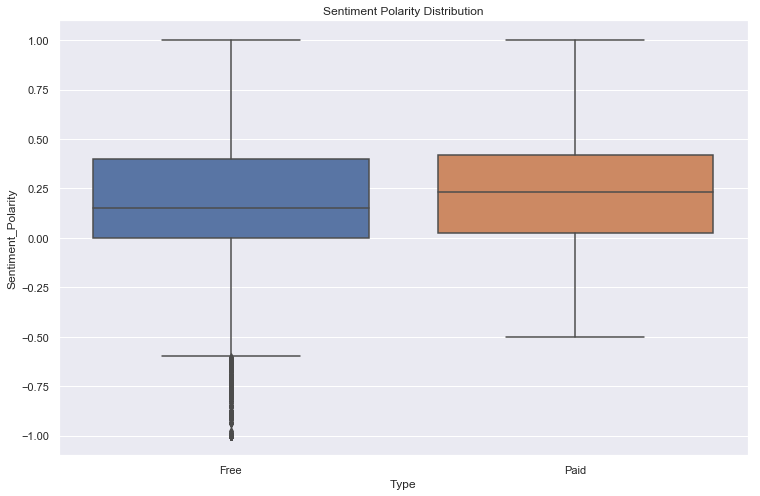

In [374]:
sns.set_style('ticks')
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_playstore_df)
title = ax.set_title('Sentiment Polarity Distribution')

Free apps receiving several negative reviews inidcated by the outliers. Paid apps genarally getting somewhat moderate reviews

In [378]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muneermk/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### WORDCLOUD

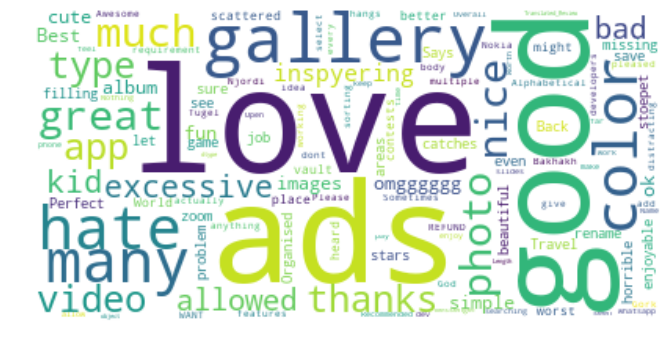

In [381]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=200, colormap="viridis") # generate word cloud

from nltk.corpus import stopwords
stop = stopwords.words('english')
stop = stop + ['app', 'APP' ,'ap', 'App', 'apps', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
            'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher']


merged_playstore_df['Translated_Review'] = merged_playstore_df['Translated_Review'].apply(lambda x: " ".join(x for x in str(x).split(' ') if x not in stop))

merged_playstore_df.Translated_Review = merged_playstore_df.Translated_Review.apply(lambda x: x if 'app' not in x.split(' ') else np.nan)
merged_playstore_df.dropna(subset=['Translated_Review'], inplace=True)


free = merged_playstore_df.loc[merged_playstore_df.Type=='Free']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(free)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Free Apps
###### Positive Words : 
love, good, great, nice <br>
##### Negative Words : 
ads, hate, bad

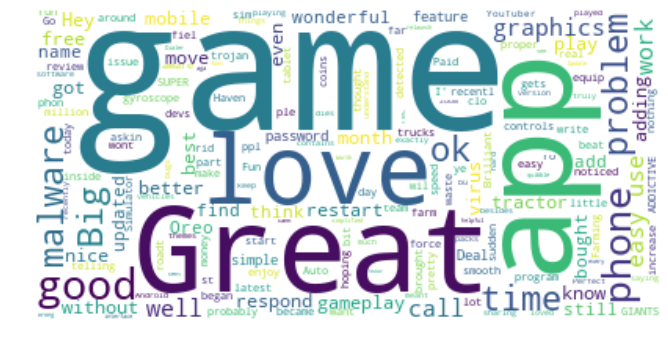

In [382]:
paid = merged_playstore_df.loc[merged_playstore_df.Type=='Paid']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(paid)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Paid Apps
###### Positive Words : 
love, love, great <br>
##### Negative Words : 
problem, malware

# Conclusion

<li>Average rating of (active) apps on Google Play Store is 4.17.</li>
<li>Users prefer to pay for apps that are light-weighted. Thus, a paid app that is bulky may not perform well in the market.</li>
<li>Most of the top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy.</li>
<li>Most of the top rated apps are optimally priced between ~1$ to ~30$ - neither too cheap nor too expensive.</li>
<li>Medical and Family apps are the most expensive and even extend upto 80$.</li>
<li>Users tend to download a given app more if it has been reviewed by a large number of people.</li>
<li>Health and Fitness apps receive more than 85% positive reviews. Game and Social apps receive mixed feedback - 50% positive and 50% negative.</li>
<li>Users are more grim and harsh while reviewing free apps than paid apps.</li>